<a href="https://colab.research.google.com/github/Akashsky123/Deep-Learning-Lab/blob/main/Experiment-4/Experiment_4(CIFAR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision matplotlib tqdm


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import os


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cpu')

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_data  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=64, shuffle=False)


100%|██████████| 170M/170M [00:01<00:00, 99.2MB/s]


In [ ]:
class CNNModel(nn.Module):
    def __init__(self, activation='relu', init_type='xavier'):
        super().__init__()

        if activation == 'relu':
            act = nn.ReLU()
        elif activation == 'tanh':
            act = nn.Tanh()
        else:
            act = nn.LeakyReLU(0.1)

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            act,
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            act,
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(64 * 8 * 8, 256),
            act,
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

        self.initialize_weights(init_type)

    def initialize_weights(self, init_type):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                if init_type == 'xavier':
                    nn.init.xavier_uniform_(m.weight)
                elif init_type == 'kaiming':
                    nn.init.kaiming_normal_(m.weight)
                else:
                    nn.init.normal_(m.weight, 0, 0.01)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


In [ ]:
def train_model(model, optimizer, criterion, epochs=10):
    train_loss, train_acc = [], []

    for epoch in range(epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0

        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_loss.append(running_loss / len(train_loader))
        train_acc.append(100 * correct / total)

        print(f"Epoch [{epoch+1}], Loss: {train_loss[-1]:.4f}, Accuracy: {train_acc[-1]:.2f}%")

    return train_loss, train_acc


In [ ]:
activations = ['relu', 'tanh', 'leaky']
initializations = ['xavier', 'kaiming', 'random']
optimizers_list = ['sgd', 'adam', 'rmsprop']

results = {}

for act in activations:
    for init in initializations:
        for opt in optimizers_list:
            print(f"\nTraining: {act} | {init} | {opt}")

            model = CNNModel(act, init).to(device)
            criterion = nn.CrossEntropyLoss()

            if opt == 'sgd':
                optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
            elif opt == 'adam':
                optimizer = optim.Adam(model.parameters(), lr=0.001)
            else:
                optimizer = optim.RMSprop(model.parameters(), lr=0.001)

            loss, acc = train_model(model, optimizer, criterion, epochs=5)
            results[(act, init, opt)] = (loss, acc)



Training: relu | xavier | sgd


100%|██████████| 782/782 [01:49<00:00,  7.14it/s]


Epoch [1], Loss: 1.6030, Accuracy: 43.03%


100%|██████████| 782/782 [01:49<00:00,  7.11it/s]


Epoch [2], Loss: 1.2447, Accuracy: 55.67%


100%|██████████| 782/782 [01:49<00:00,  7.12it/s]


Epoch [3], Loss: 1.0587, Accuracy: 62.75%


100%|██████████| 782/782 [01:48<00:00,  7.23it/s]


Epoch [4], Loss: 0.9493, Accuracy: 66.71%


100%|██████████| 782/782 [01:48<00:00,  7.19it/s]


Epoch [5], Loss: 0.8672, Accuracy: 69.90%

Training: relu | xavier | adam


100%|██████████| 782/782 [01:51<00:00,  7.00it/s]


Epoch [1], Loss: 1.5861, Accuracy: 43.60%


100%|██████████| 782/782 [01:51<00:00,  6.99it/s]


Epoch [2], Loss: 1.2293, Accuracy: 56.41%


100%|██████████| 782/782 [01:57<00:00,  6.66it/s]


Epoch [3], Loss: 1.0702, Accuracy: 62.43%


100%|██████████| 782/782 [01:50<00:00,  7.08it/s]


Epoch [4], Loss: 0.9815, Accuracy: 66.00%


100%|██████████| 782/782 [01:51<00:00,  7.00it/s]


Epoch [5], Loss: 0.9085, Accuracy: 68.48%

Training: relu | xavier | rmsprop


100%|██████████| 782/782 [01:49<00:00,  7.12it/s]


Epoch [1], Loss: 1.7431, Accuracy: 42.83%


100%|██████████| 782/782 [01:48<00:00,  7.18it/s]


Epoch [2], Loss: 1.2403, Accuracy: 56.44%


100%|██████████| 782/782 [01:49<00:00,  7.14it/s]


Epoch [3], Loss: 1.0908, Accuracy: 62.33%


100%|██████████| 782/782 [01:48<00:00,  7.19it/s]


Epoch [4], Loss: 0.9978, Accuracy: 65.55%


100%|██████████| 782/782 [01:48<00:00,  7.21it/s]


Epoch [5], Loss: 0.9243, Accuracy: 68.00%

Training: relu | kaiming | sgd


100%|██████████| 782/782 [01:49<00:00,  7.17it/s]


Epoch [1], Loss: 1.5931, Accuracy: 43.62%


100%|██████████| 782/782 [01:49<00:00,  7.17it/s]


Epoch [2], Loss: 1.2385, Accuracy: 56.33%


100%|██████████| 782/782 [01:49<00:00,  7.16it/s]


Epoch [3], Loss: 1.0581, Accuracy: 63.38%


100%|██████████| 782/782 [01:49<00:00,  7.16it/s]


Epoch [4], Loss: 0.9450, Accuracy: 67.17%


100%|██████████| 782/782 [01:49<00:00,  7.16it/s]


Epoch [5], Loss: 0.8645, Accuracy: 70.01%

Training: relu | kaiming | adam


100%|██████████| 782/782 [01:54<00:00,  6.86it/s]


Epoch [1], Loss: 1.5699, Accuracy: 44.69%


100%|██████████| 782/782 [01:53<00:00,  6.91it/s]


Epoch [2], Loss: 1.2098, Accuracy: 57.04%


100%|██████████| 782/782 [01:52<00:00,  6.96it/s]


Epoch [3], Loss: 1.0922, Accuracy: 61.56%


100%|██████████| 782/782 [01:52<00:00,  6.95it/s]


Epoch [4], Loss: 0.9991, Accuracy: 65.20%


100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


Epoch [5], Loss: 0.9338, Accuracy: 67.37%

Training: relu | kaiming | rmsprop


100%|██████████| 782/782 [01:51<00:00,  7.04it/s]


Epoch [1], Loss: 1.7926, Accuracy: 41.31%


100%|██████████| 782/782 [01:50<00:00,  7.09it/s]


Epoch [2], Loss: 1.2920, Accuracy: 54.56%


100%|██████████| 782/782 [01:49<00:00,  7.12it/s]


Epoch [3], Loss: 1.1361, Accuracy: 60.41%


100%|██████████| 782/782 [01:54<00:00,  6.86it/s]


Epoch [4], Loss: 1.0298, Accuracy: 64.25%


100%|██████████| 782/782 [01:53<00:00,  6.88it/s]


Epoch [5], Loss: 0.9635, Accuracy: 66.80%

Training: relu | random | sgd


100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


Epoch [1], Loss: 1.4928, Accuracy: 46.52%


100%|██████████| 782/782 [01:49<00:00,  7.14it/s]


Epoch [2], Loss: 1.1495, Accuracy: 59.92%


100%|██████████| 782/782 [01:49<00:00,  7.16it/s]


Epoch [3], Loss: 0.9803, Accuracy: 65.67%


100%|██████████| 782/782 [01:49<00:00,  7.16it/s]


Epoch [4], Loss: 0.8644, Accuracy: 70.03%


100%|██████████| 782/782 [01:47<00:00,  7.26it/s]


Epoch [5], Loss: 0.7895, Accuracy: 72.44%

Training: relu | random | adam


100%|██████████| 782/782 [01:52<00:00,  6.96it/s]


Epoch [1], Loss: 1.3446, Accuracy: 51.90%


100%|██████████| 782/782 [01:51<00:00,  6.98it/s]


Epoch [2], Loss: 1.0435, Accuracy: 63.61%


100%|██████████| 782/782 [01:50<00:00,  7.06it/s]


Epoch [3], Loss: 0.9134, Accuracy: 68.24%


100%|██████████| 782/782 [01:51<00:00,  7.00it/s]


Epoch [4], Loss: 0.8252, Accuracy: 71.53%


100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


Epoch [5], Loss: 0.7632, Accuracy: 73.61%

Training: relu | random | rmsprop


100%|██████████| 782/782 [01:48<00:00,  7.22it/s]


Epoch [1], Loss: 1.4916, Accuracy: 47.40%


100%|██████████| 782/782 [01:48<00:00,  7.23it/s]


Epoch [2], Loss: 1.1082, Accuracy: 61.15%


100%|██████████| 782/782 [01:47<00:00,  7.28it/s]


Epoch [3], Loss: 0.9692, Accuracy: 66.31%


100%|██████████| 782/782 [01:48<00:00,  7.21it/s]


Epoch [4], Loss: 0.8887, Accuracy: 68.95%


100%|██████████| 782/782 [01:47<00:00,  7.26it/s]


Epoch [5], Loss: 0.8201, Accuracy: 71.44%

Training: tanh | xavier | sgd


100%|██████████| 782/782 [01:56<00:00,  6.72it/s]


Epoch [1], Loss: 1.6106, Accuracy: 43.56%


100%|██████████| 782/782 [01:57<00:00,  6.68it/s]


Epoch [2], Loss: 1.2532, Accuracy: 55.69%


100%|██████████| 782/782 [01:56<00:00,  6.70it/s]


Epoch [3], Loss: 1.1023, Accuracy: 61.38%


100%|██████████| 782/782 [01:56<00:00,  6.68it/s]


Epoch [4], Loss: 1.0038, Accuracy: 64.70%


100%|██████████| 782/782 [01:57<00:00,  6.68it/s]


Epoch [5], Loss: 0.9380, Accuracy: 67.34%

Training: tanh | xavier | adam


100%|██████████| 782/782 [02:00<00:00,  6.47it/s]


Epoch [1], Loss: 1.7673, Accuracy: 40.23%


100%|██████████| 782/782 [01:59<00:00,  6.56it/s]


Epoch [2], Loss: 1.2509, Accuracy: 55.12%


100%|██████████| 782/782 [01:59<00:00,  6.56it/s]


Epoch [3], Loss: 1.1080, Accuracy: 60.56%


100%|██████████| 782/782 [02:00<00:00,  6.51it/s]


Epoch [4], Loss: 1.0194, Accuracy: 64.22%


100%|██████████| 782/782 [01:59<00:00,  6.54it/s]


Epoch [5], Loss: 0.9740, Accuracy: 65.86%

Training: tanh | xavier | rmsprop


100%|██████████| 782/782 [02:00<00:00,  6.50it/s]


Epoch [1], Loss: 1.7871, Accuracy: 38.69%


100%|██████████| 782/782 [01:57<00:00,  6.64it/s]


Epoch [2], Loss: 1.3020, Accuracy: 53.01%


100%|██████████| 782/782 [01:57<00:00,  6.67it/s]


Epoch [3], Loss: 1.1464, Accuracy: 58.94%


100%|██████████| 782/782 [01:57<00:00,  6.64it/s]


Epoch [4], Loss: 1.0566, Accuracy: 62.43%


100%|██████████| 782/782 [01:57<00:00,  6.66it/s]


Epoch [5], Loss: 1.0087, Accuracy: 64.29%

Training: tanh | kaiming | sgd


100%|██████████| 782/782 [01:57<00:00,  6.65it/s]


Epoch [1], Loss: 1.5946, Accuracy: 44.24%


100%|██████████| 782/782 [01:58<00:00,  6.59it/s]


Epoch [2], Loss: 1.2352, Accuracy: 56.42%


100%|██████████| 782/782 [01:59<00:00,  6.56it/s]


Epoch [3], Loss: 1.0896, Accuracy: 61.90%


100%|██████████| 782/782 [01:57<00:00,  6.68it/s]


Epoch [4], Loss: 1.0071, Accuracy: 64.87%


100%|██████████| 782/782 [01:57<00:00,  6.68it/s]


Epoch [5], Loss: 0.9461, Accuracy: 67.01%

Training: tanh | kaiming | adam


100%|██████████| 782/782 [02:01<00:00,  6.42it/s]


Epoch [1], Loss: 1.7471, Accuracy: 40.93%


100%|██████████| 782/782 [02:00<00:00,  6.49it/s]


Epoch [2], Loss: 1.2151, Accuracy: 56.81%


100%|██████████| 782/782 [02:01<00:00,  6.43it/s]


Epoch [3], Loss: 1.0748, Accuracy: 61.92%


100%|██████████| 782/782 [01:59<00:00,  6.53it/s]


Epoch [4], Loss: 1.0009, Accuracy: 64.71%


100%|██████████| 782/782 [02:00<00:00,  6.47it/s]


Epoch [5], Loss: 0.9534, Accuracy: 66.57%

Training: tanh | kaiming | rmsprop


100%|██████████| 782/782 [01:58<00:00,  6.58it/s]


Epoch [1], Loss: 1.7539, Accuracy: 39.91%


100%|██████████| 782/782 [02:04<00:00,  6.26it/s]


Epoch [2], Loss: 1.2857, Accuracy: 53.57%


100%|██████████| 782/782 [01:58<00:00,  6.62it/s]


Epoch [3], Loss: 1.1364, Accuracy: 59.35%


100%|██████████| 782/782 [01:58<00:00,  6.60it/s]


Epoch [4], Loss: 1.0568, Accuracy: 62.76%


100%|██████████| 782/782 [01:57<00:00,  6.64it/s]


Epoch [5], Loss: 1.0049, Accuracy: 64.46%

Training: tanh | random | sgd


100%|██████████| 782/782 [01:56<00:00,  6.69it/s]


Epoch [1], Loss: 1.5074, Accuracy: 46.03%


100%|██████████| 782/782 [01:56<00:00,  6.69it/s]


Epoch [2], Loss: 1.2078, Accuracy: 57.46%


100%|██████████| 782/782 [01:58<00:00,  6.62it/s]


Epoch [3], Loss: 1.0642, Accuracy: 62.58%


100%|██████████| 782/782 [01:58<00:00,  6.60it/s]


Epoch [4], Loss: 0.9761, Accuracy: 66.16%


100%|██████████| 782/782 [01:57<00:00,  6.63it/s]


Epoch [5], Loss: 0.9202, Accuracy: 68.04%

Training: tanh | random | adam


100%|██████████| 782/782 [01:59<00:00,  6.52it/s]


Epoch [1], Loss: 1.4949, Accuracy: 46.10%


100%|██████████| 782/782 [02:00<00:00,  6.52it/s]


Epoch [2], Loss: 1.2478, Accuracy: 55.34%


100%|██████████| 782/782 [02:01<00:00,  6.45it/s]


Epoch [3], Loss: 1.1354, Accuracy: 59.44%


100%|██████████| 782/782 [02:00<00:00,  6.51it/s]


Epoch [4], Loss: 1.0688, Accuracy: 62.53%


100%|██████████| 782/782 [02:00<00:00,  6.51it/s]


Epoch [5], Loss: 1.0060, Accuracy: 64.45%

Training: tanh | random | rmsprop


100%|██████████| 782/782 [01:57<00:00,  6.67it/s]


Epoch [1], Loss: 1.5927, Accuracy: 42.21%


100%|██████████| 782/782 [01:57<00:00,  6.66it/s]


Epoch [2], Loss: 1.3246, Accuracy: 52.38%


100%|██████████| 782/782 [01:57<00:00,  6.64it/s]


Epoch [3], Loss: 1.2000, Accuracy: 57.04%


100%|██████████| 782/782 [01:59<00:00,  6.57it/s]


Epoch [4], Loss: 1.1020, Accuracy: 60.71%


100%|██████████| 782/782 [01:58<00:00,  6.63it/s]


Epoch [5], Loss: 1.0420, Accuracy: 63.28%

Training: leaky | xavier | sgd


100%|██████████| 782/782 [01:55<00:00,  6.78it/s]


Epoch [1], Loss: 1.4891, Accuracy: 47.48%


100%|██████████| 782/782 [01:53<00:00,  6.92it/s]


Epoch [2], Loss: 1.1084, Accuracy: 60.87%


100%|██████████| 782/782 [01:52<00:00,  6.94it/s]


Epoch [3], Loss: 0.9566, Accuracy: 66.33%


100%|██████████| 782/782 [01:52<00:00,  6.94it/s]


Epoch [4], Loss: 0.8639, Accuracy: 69.62%


100%|██████████| 782/782 [01:59<00:00,  6.56it/s]


Epoch [5], Loss: 0.8089, Accuracy: 71.83%

Training: leaky | xavier | adam


100%|██████████| 782/782 [01:57<00:00,  6.67it/s]


Epoch [1], Loss: 1.5188, Accuracy: 49.22%


100%|██████████| 782/782 [01:56<00:00,  6.70it/s]


Epoch [2], Loss: 1.0545, Accuracy: 63.05%


100%|██████████| 782/782 [01:59<00:00,  6.52it/s]


Epoch [3], Loss: 0.9181, Accuracy: 67.88%


100%|██████████| 782/782 [01:59<00:00,  6.52it/s]


Epoch [4], Loss: 0.8331, Accuracy: 70.83%


100%|██████████| 782/782 [02:01<00:00,  6.43it/s]


Epoch [5], Loss: 0.7723, Accuracy: 72.91%

Training: leaky | xavier | rmsprop


100%|██████████| 782/782 [01:56<00:00,  6.68it/s]


Epoch [1], Loss: 1.7724, Accuracy: 48.23%


100%|██████████| 782/782 [01:56<00:00,  6.74it/s]


Epoch [2], Loss: 1.0906, Accuracy: 62.51%


100%|██████████| 782/782 [01:57<00:00,  6.64it/s]


Epoch [3], Loss: 0.9336, Accuracy: 67.41%


100%|██████████| 782/782 [01:53<00:00,  6.88it/s]


Epoch [4], Loss: 0.8478, Accuracy: 70.42%


100%|██████████| 782/782 [01:56<00:00,  6.73it/s]


Epoch [5], Loss: 0.7834, Accuracy: 72.63%

Training: leaky | kaiming | sgd


100%|██████████| 782/782 [01:54<00:00,  6.84it/s]


Epoch [1], Loss: 1.4677, Accuracy: 48.75%


100%|██████████| 782/782 [01:53<00:00,  6.88it/s]


Epoch [2], Loss: 1.0877, Accuracy: 61.46%


100%|██████████| 782/782 [01:53<00:00,  6.88it/s]


Epoch [3], Loss: 0.9486, Accuracy: 66.37%


100%|██████████| 782/782 [01:51<00:00,  6.99it/s]


Epoch [4], Loss: 0.8624, Accuracy: 69.66%


100%|██████████| 782/782 [01:52<00:00,  6.98it/s]


Epoch [5], Loss: 0.8038, Accuracy: 71.53%

Training: leaky | kaiming | adam


100%|██████████| 782/782 [01:54<00:00,  6.83it/s]


Epoch [1], Loss: 1.5118, Accuracy: 49.26%


100%|██████████| 782/782 [01:54<00:00,  6.84it/s]


Epoch [2], Loss: 1.0561, Accuracy: 63.06%


100%|██████████| 782/782 [01:54<00:00,  6.83it/s]


Epoch [3], Loss: 0.9152, Accuracy: 68.12%


100%|██████████| 782/782 [01:55<00:00,  6.78it/s]


Epoch [4], Loss: 0.8396, Accuracy: 70.94%


100%|██████████| 782/782 [01:55<00:00,  6.79it/s]


Epoch [5], Loss: 0.7784, Accuracy: 72.99%

Training: leaky | kaiming | rmsprop


100%|██████████| 782/782 [01:55<00:00,  6.79it/s]


Epoch [1], Loss: 1.7573, Accuracy: 48.43%


100%|██████████| 782/782 [01:55<00:00,  6.79it/s]


Epoch [2], Loss: 1.0942, Accuracy: 61.93%


100%|██████████| 782/782 [01:54<00:00,  6.82it/s]


Epoch [3], Loss: 0.9463, Accuracy: 67.14%


100%|██████████| 782/782 [01:54<00:00,  6.83it/s]


Epoch [4], Loss: 0.8583, Accuracy: 70.24%


100%|██████████| 782/782 [01:55<00:00,  6.79it/s]


Epoch [5], Loss: 0.7975, Accuracy: 72.29%

Training: leaky | random | sgd


100%|██████████| 782/782 [01:52<00:00,  6.93it/s]


Epoch [1], Loss: 1.4338, Accuracy: 48.78%


100%|██████████| 782/782 [01:52<00:00,  6.93it/s]


Epoch [2], Loss: 1.0868, Accuracy: 61.90%


100%|██████████| 782/782 [01:52<00:00,  6.96it/s]


Epoch [3], Loss: 0.9359, Accuracy: 67.33%


100%|██████████| 782/782 [01:53<00:00,  6.86it/s]


Epoch [4], Loss: 0.8418, Accuracy: 70.59%


100%|██████████| 782/782 [01:53<00:00,  6.89it/s]


Epoch [5], Loss: 0.7741, Accuracy: 72.99%

Training: leaky | random | adam


100%|██████████| 782/782 [01:56<00:00,  6.74it/s]


Epoch [1], Loss: 1.3470, Accuracy: 52.07%


100%|██████████| 782/782 [01:55<00:00,  6.76it/s]


Epoch [2], Loss: 1.0390, Accuracy: 63.48%


100%|██████████| 782/782 [01:55<00:00,  6.74it/s]


Epoch [3], Loss: 0.9225, Accuracy: 67.96%


100%|██████████| 782/782 [01:56<00:00,  6.69it/s]


Epoch [4], Loss: 0.8437, Accuracy: 70.88%


100%|██████████| 782/782 [01:56<00:00,  6.73it/s]


Epoch [5], Loss: 0.7799, Accuracy: 72.81%

Training: leaky | random | rmsprop


100%|██████████| 782/782 [01:54<00:00,  6.83it/s]


Epoch [1], Loss: 1.4520, Accuracy: 49.21%


100%|██████████| 782/782 [01:54<00:00,  6.82it/s]


Epoch [2], Loss: 1.0758, Accuracy: 62.42%


100%|██████████| 782/782 [01:55<00:00,  6.79it/s]


Epoch [3], Loss: 0.9468, Accuracy: 66.87%


100%|██████████| 782/782 [01:54<00:00,  6.81it/s]


Epoch [4], Loss: 0.8644, Accuracy: 70.01%


100%|██████████| 782/782 [01:54<00:00,  6.83it/s]


Epoch [5], Loss: 0.8026, Accuracy: 72.05%


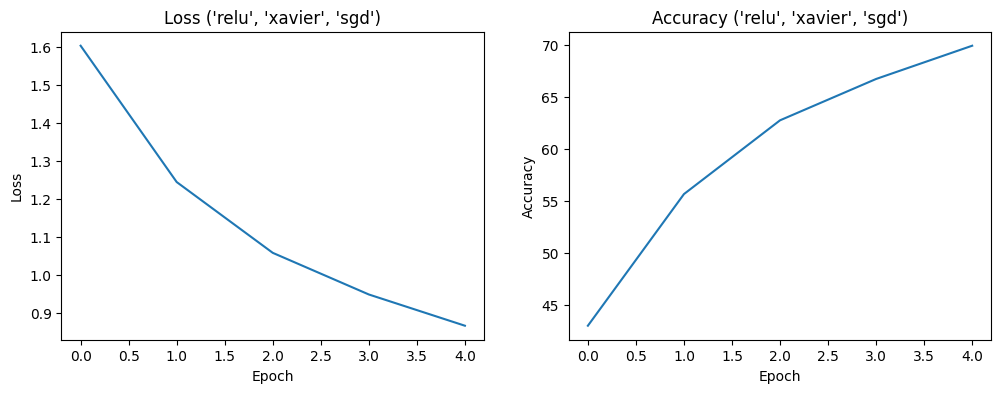

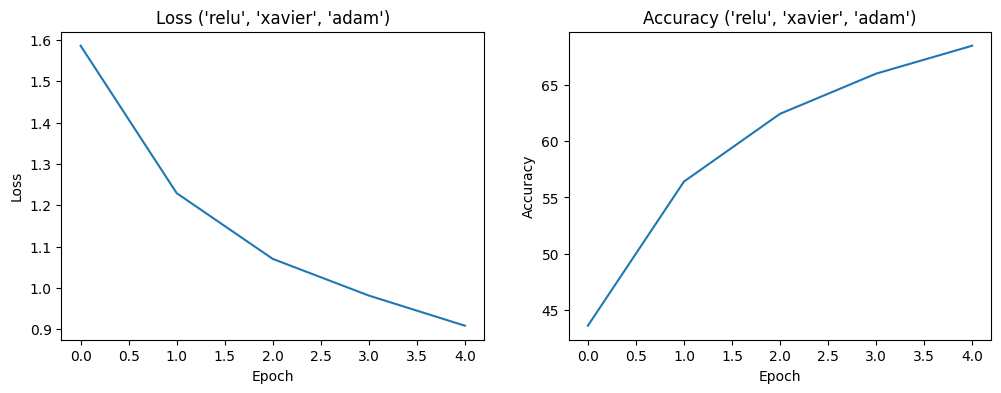

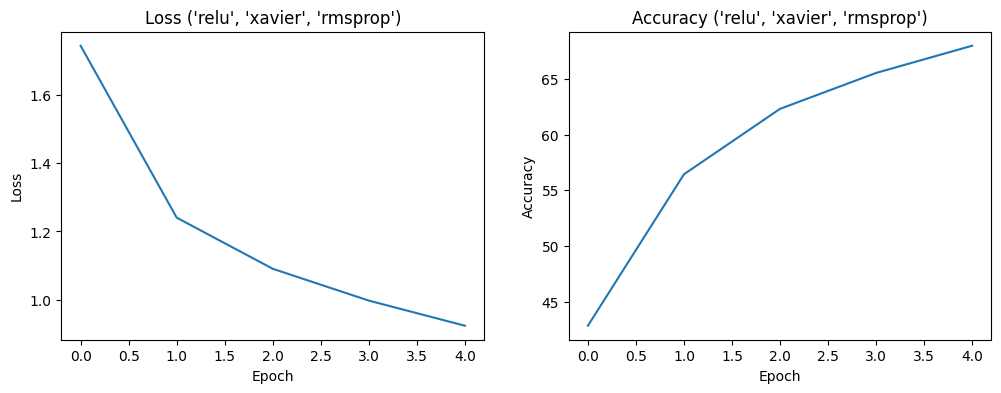

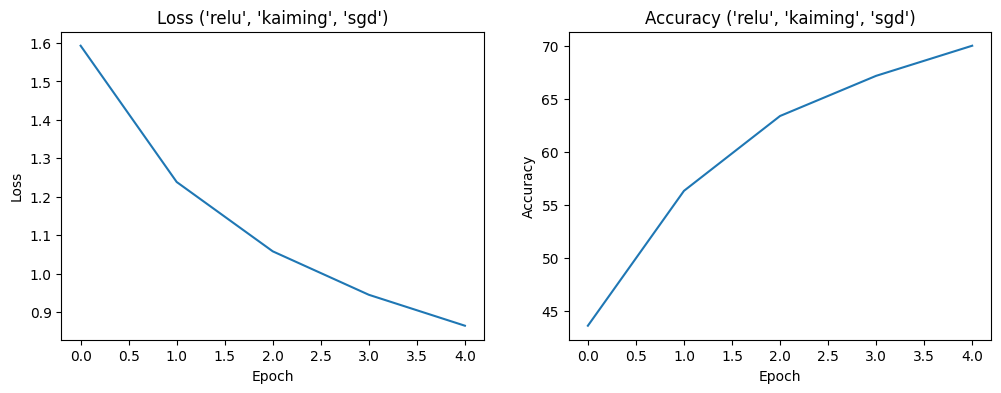

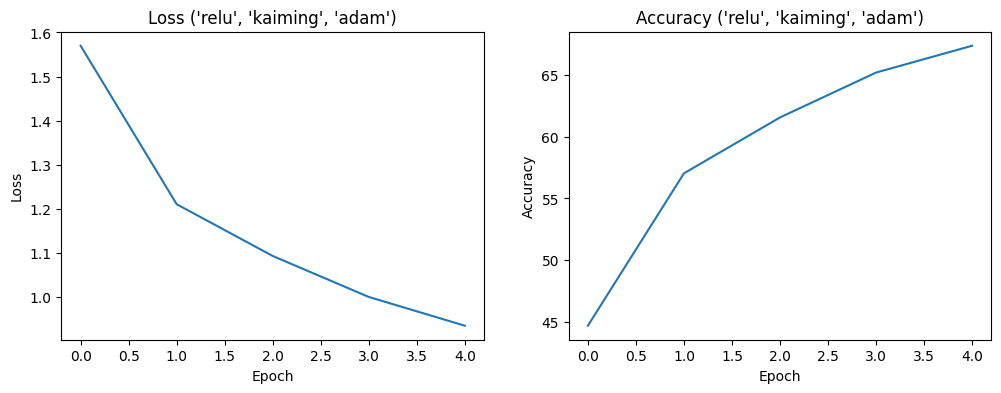

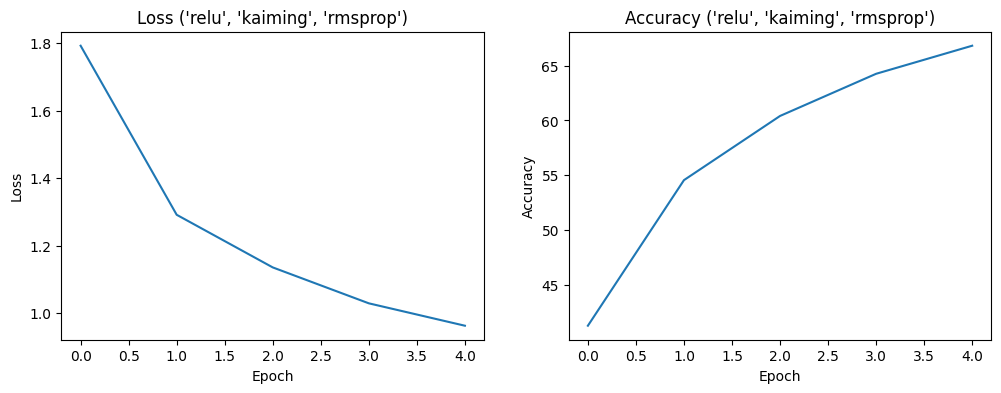

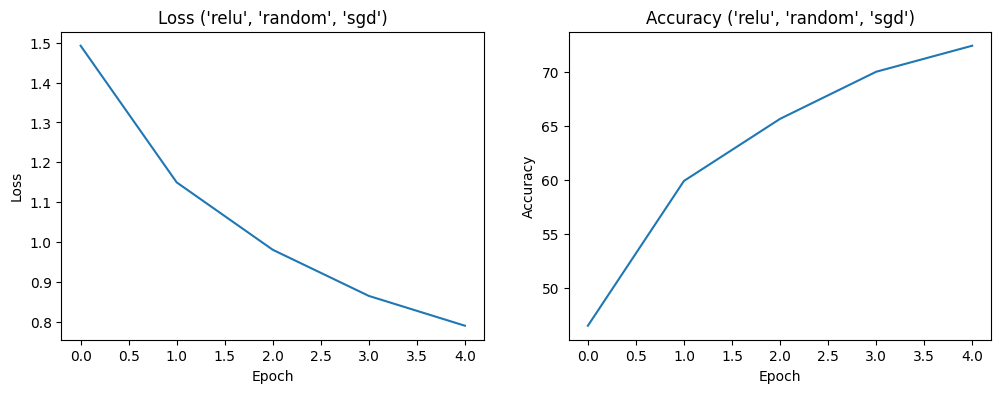

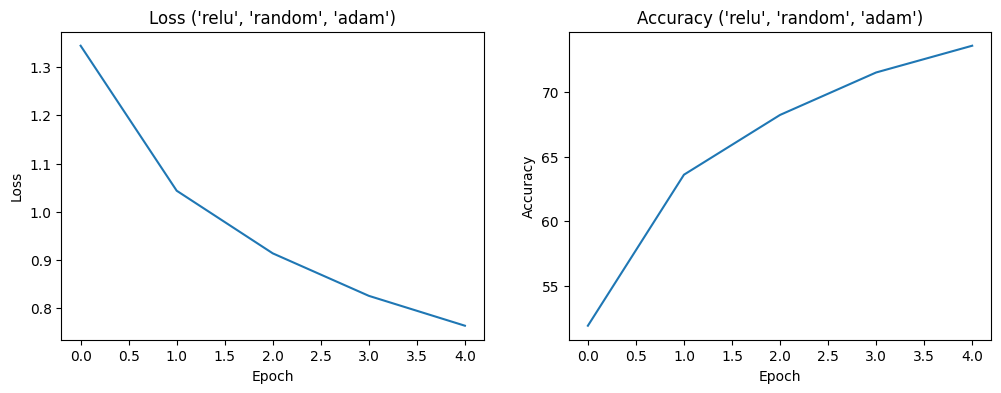

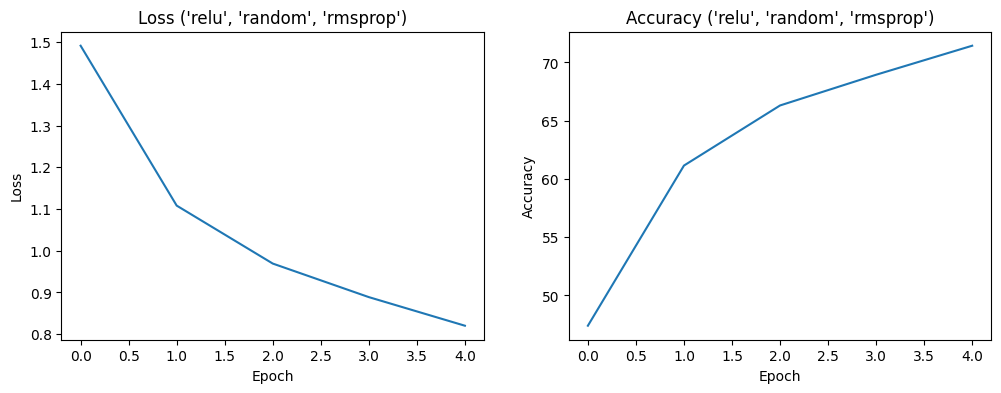

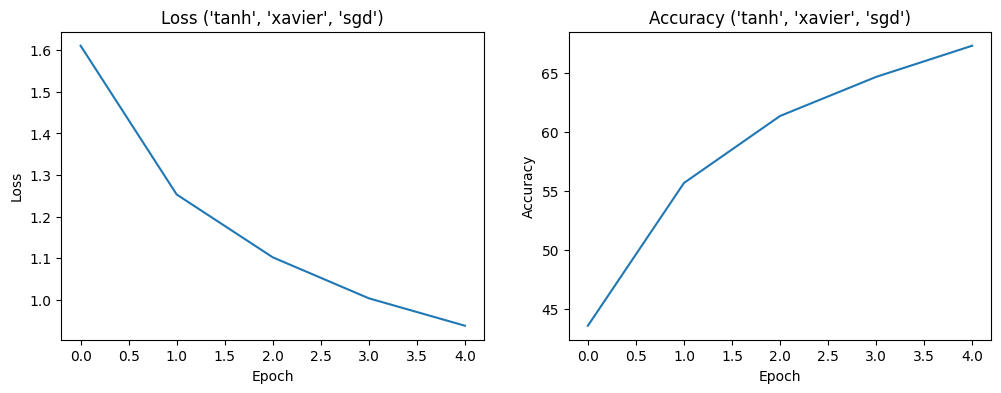

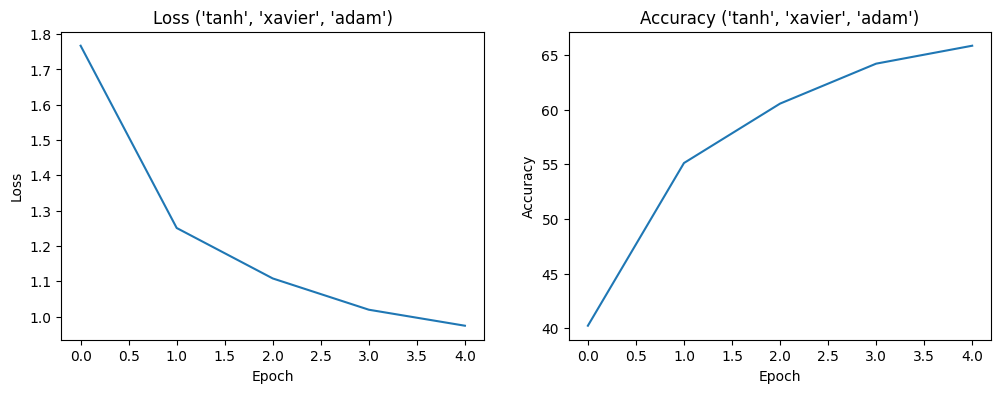

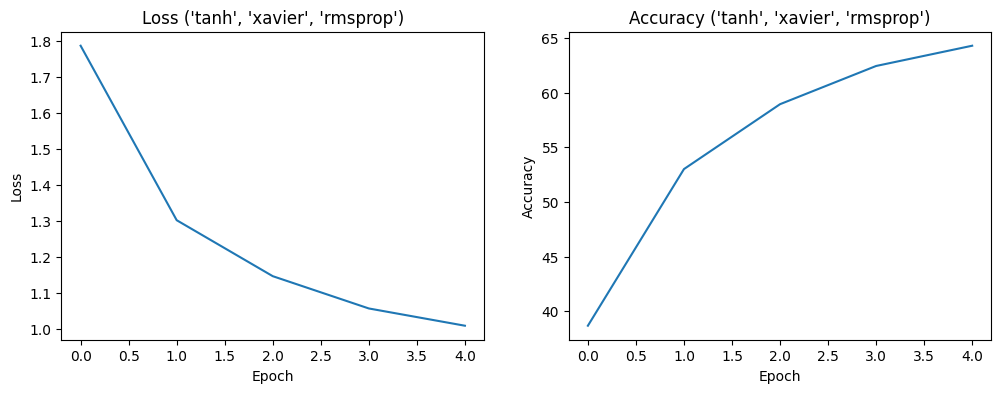

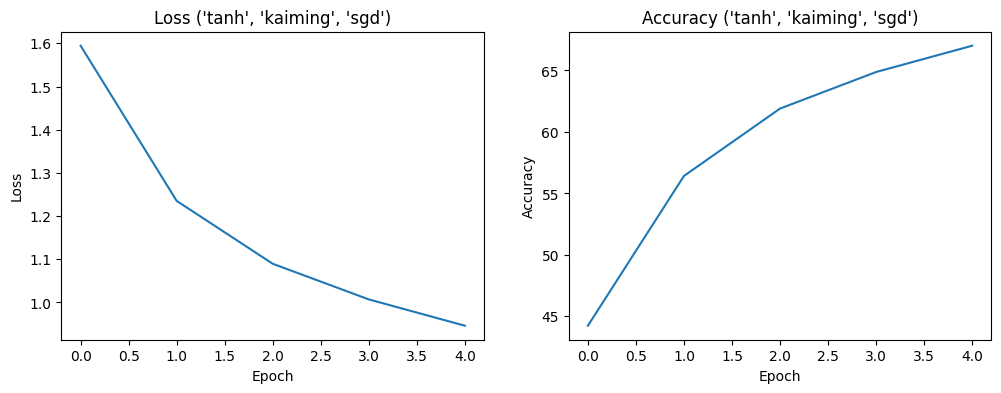

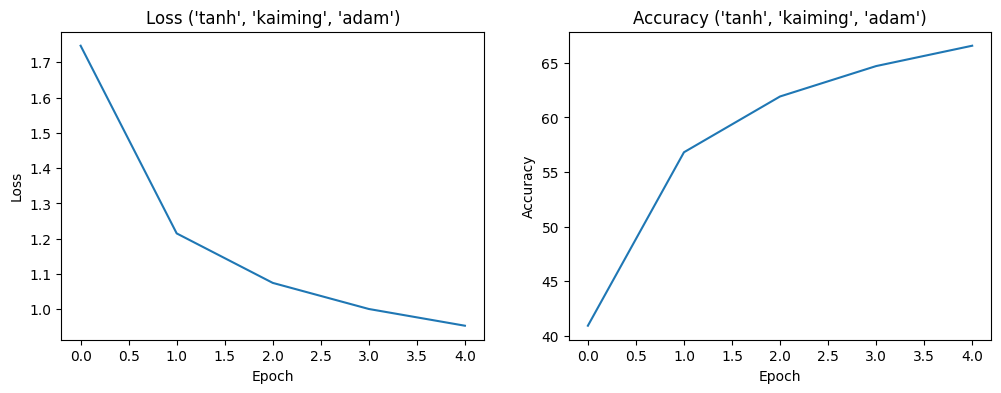

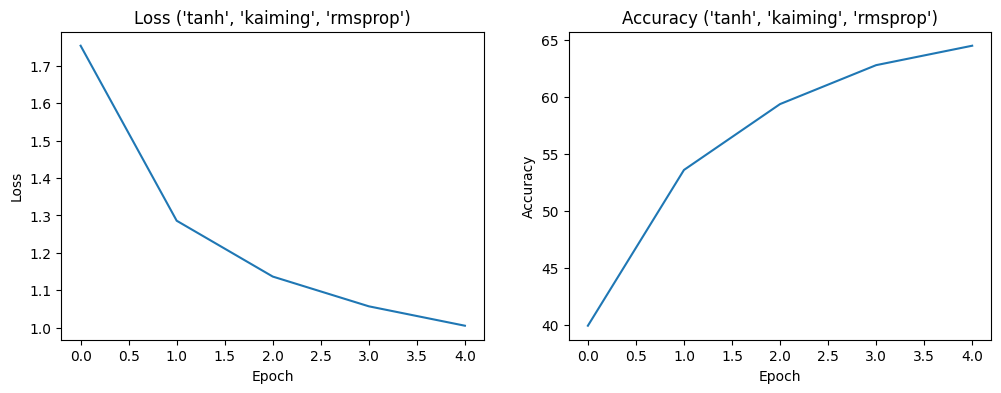

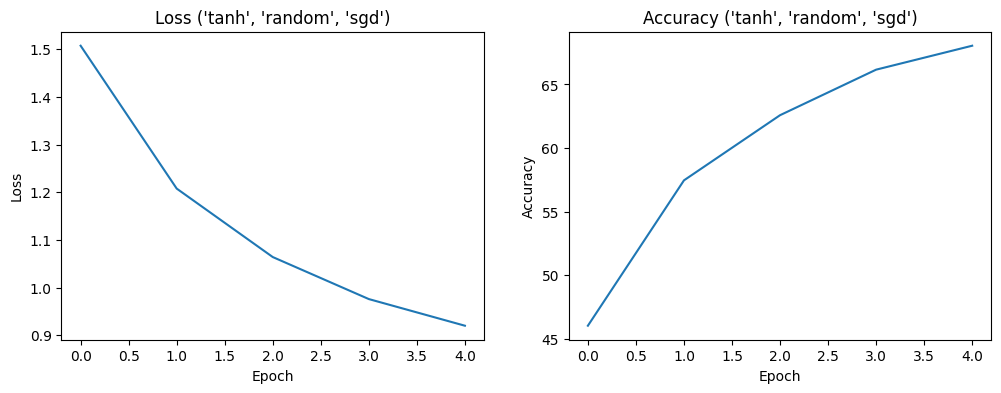

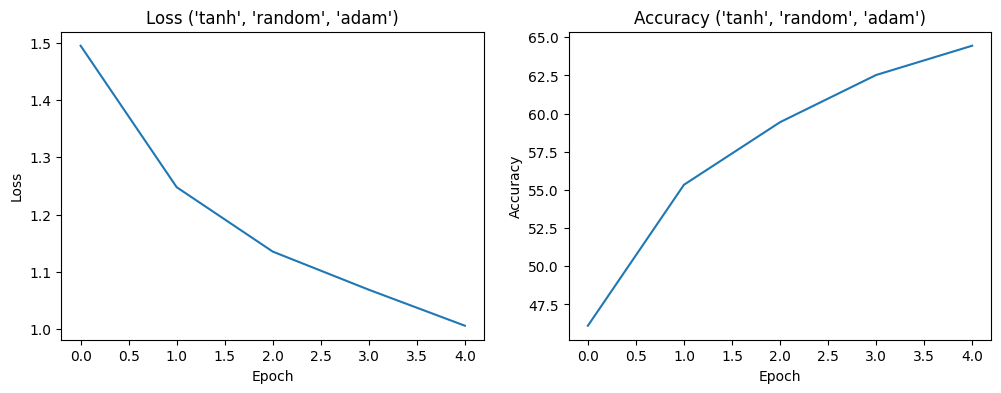

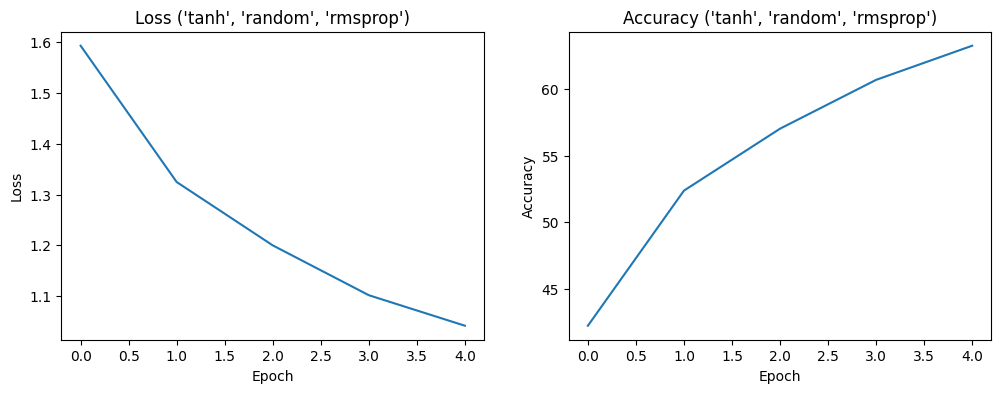

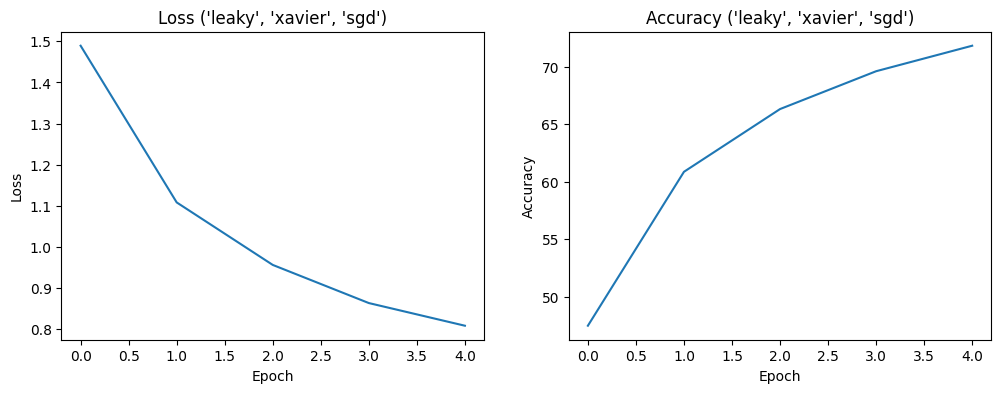

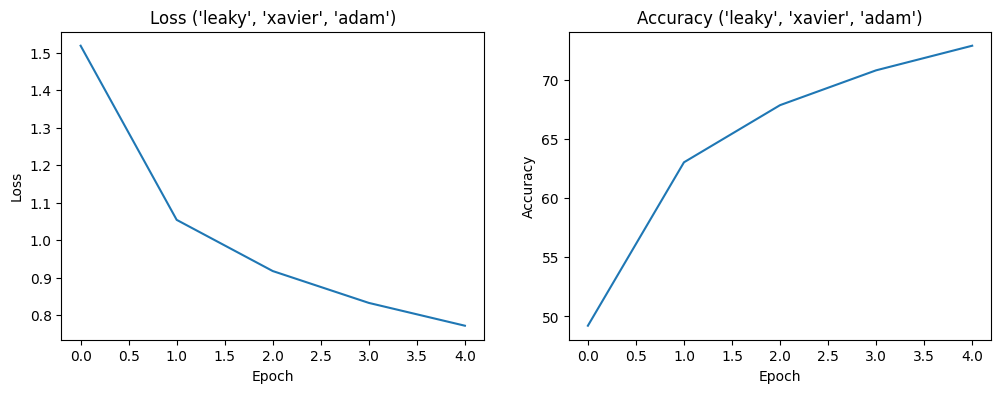

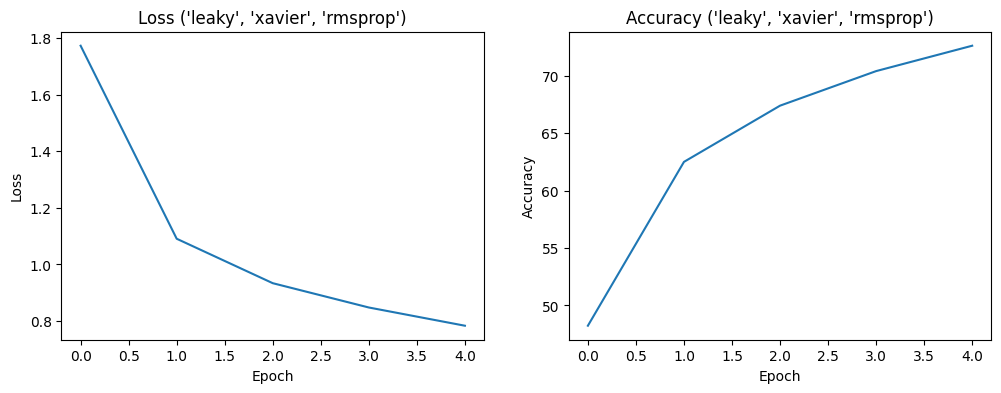

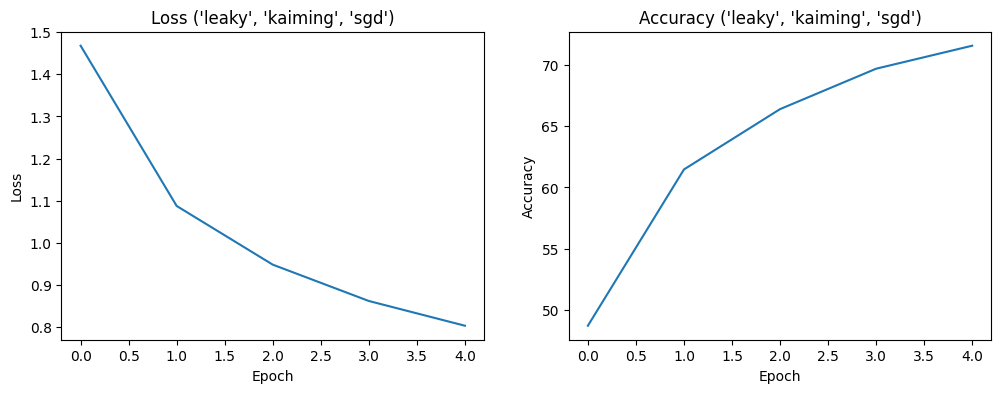

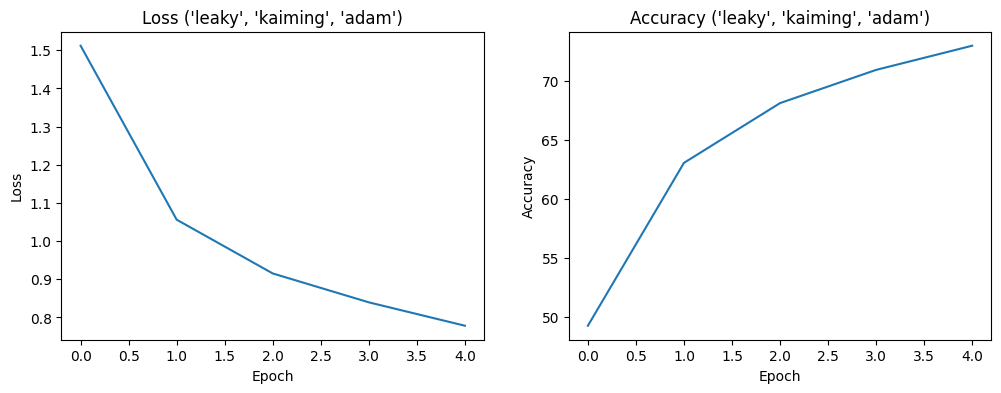

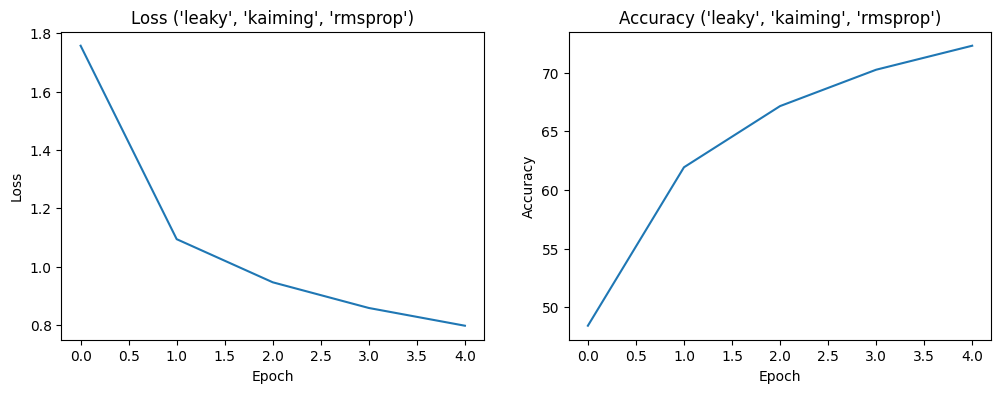

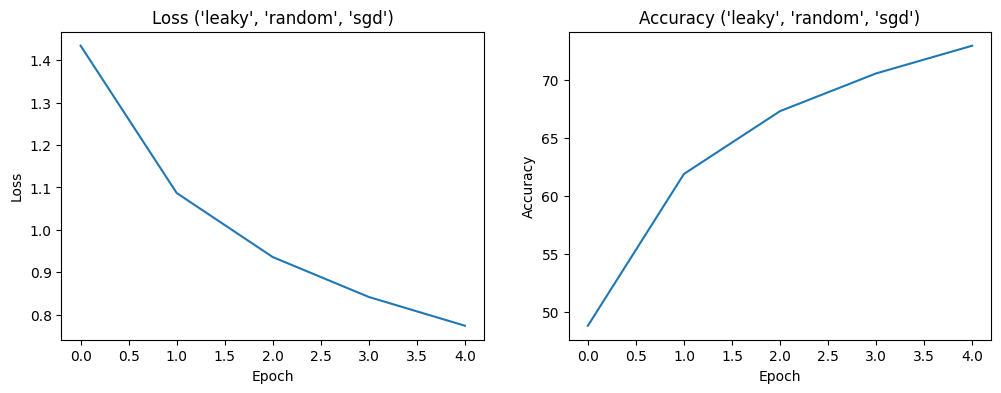

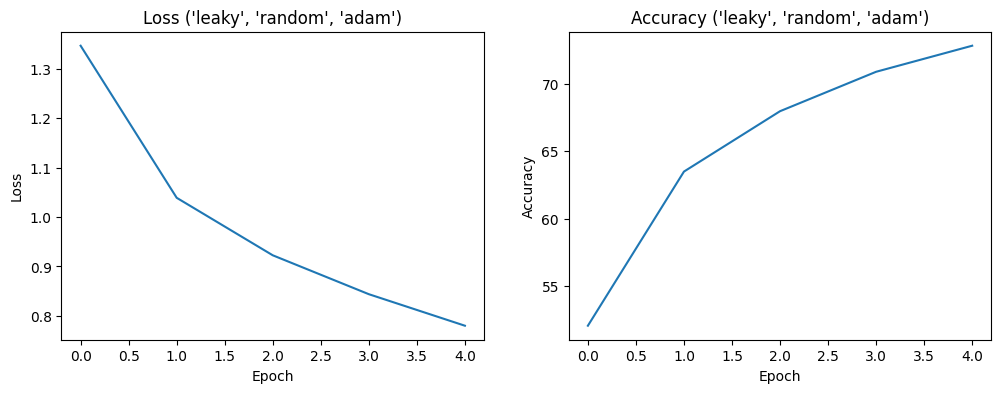

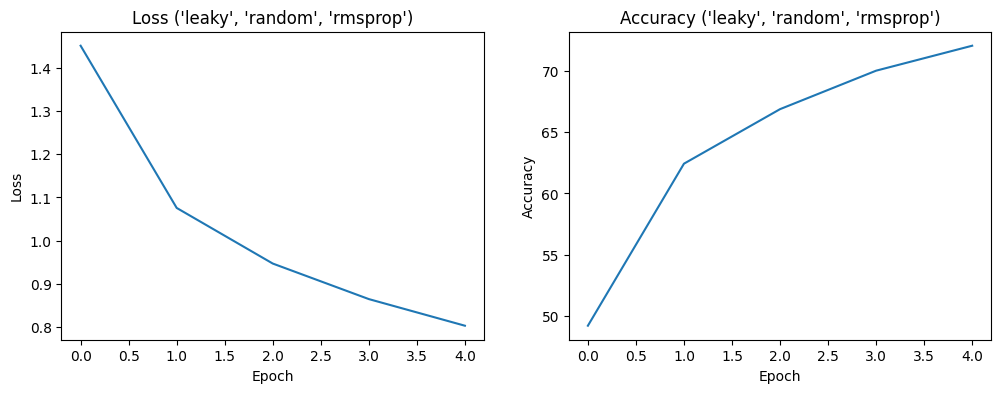

In [ ]:
for key, (loss, acc) in results.items():
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(loss)
    plt.title(f"Loss {key}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.subplot(1,2,2)
    plt.plot(acc)
    plt.title(f"Accuracy {key}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.show()


In [ ]:
resnet = models.resnet18(pretrained=True)

for param in resnet.parameters():
    param.requires_grad = False

resnet.fc = nn.Linear(resnet.fc.in_features, 10)
resnet = resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.fc.parameters(), lr=0.001)

train_model(resnet, optimizer, criterion, epochs=4)


100%|██████████| 782/782 [02:48<00:00,  4.64it/s]


Epoch [1], Loss: 1.7281, Accuracy: 39.44%


100%|██████████| 782/782 [02:48<00:00,  4.63it/s]


Epoch [2], Loss: 1.5991, Accuracy: 44.50%


100%|██████████| 782/782 [02:46<00:00,  4.68it/s]


Epoch [3], Loss: 1.5796, Accuracy: 44.83%


100%|██████████| 782/782 [02:49<00:00,  4.62it/s]

Epoch [4], Loss: 1.5767, Accuracy: 45.16%


([1.7280861105760346,
  1.5991428855739895,
  1.5795689310564105,
  1.5766988439328224],
 [39.44, 44.496, 44.83, 45.158])

In [ ]:
torch.save(resnet.state_dict(), "best_resnet18_cifar10.pth")